### Ensemble-Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=1000, noise=0.3, random_state=42)

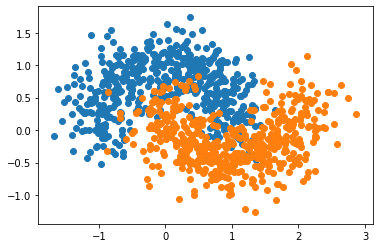

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_clf.score(X_test, y_test)

0.852

In [6]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.916

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=666)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.892

In [8]:
y_predict1 = log_clf.predict(X_test)
y_predict2 = svm_clf.predict(X_test)
y_predict3 = dt_clf.predict(X_test)

In [9]:
y_predict = np.array((y_predict1 + y_predict2 + y_predict3) >= 2, dtype='int')

In [10]:
y_predict[:10]

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0])

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.912

### 使用 VotingClassifier

In [12]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()), 
    ('svm_clf', SVC()),
    ('dt_clf', DecisionTreeClassifier(random_state=666))],
                             voting='hard')

In [13]:
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.912

### 更合理的投票 应该有权值

In [14]:
### 要求每个模型都能估计概率  predict_prob

In [15]:
voting_clf2 = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()), 
    ('svm_clf', SVC(probability=True)), #probability=True 使 svm 计算概率，消耗计算资源
    ('dt_clf', DecisionTreeClassifier(random_state=666))],
                             voting='soft')

In [16]:
voting_clf2.fit(X_train, y_train)
voting_clf2.score(X_test, y_test)

0.916

### 更多的子模型，子模型之间不能一致，要有差异性

In [17]:
#每个子模型 只看样本数据的一部分 例如：500个样本数据，每个子模型只看100个数据，每一个子模型 不需要太高的准确率

### bagging 放回取样  pasting 不放回取样

In [18]:
#bagging 更常用 不依赖随机

In [19]:
# 统计学中，放回取样名词： bootstrap

### 使用bagging

In [20]:
#例如使用决策树

In [21]:
from sklearn.ensemble import BaggingClassifier

In [22]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True)
#max_samples 每个 看多少样本，bootstrp 放回取样

In [23]:
bag_clf.fit(X_train,y_train)
bag_clf.score(X_test,y_test)

0.916

In [26]:
bag_clf2 = BaggingClassifier(DecisionTreeClassifier(),n_estimators=5000,max_samples=200,bootstrap=True)

In [28]:
bag_clf2.fit(X_train,y_train)
bag_clf2.score(X_test,y_test)

0.92

### 更多bagging 相关讨论

In [29]:
#oob out of bag
#放回取样导致一部分样本很可能没有取到  平均大约37%的样本没有取到
#可以不使用 测试数据集，使用没有取到的样本做测试数据集 
# oob_score_

In [34]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,oob_score=True)
bag_clf.fit(X,y)
bag_clf.oob_score_

0.912

In [ ]:
# n_jobs=-1 使用全部的核

In [ ]:
# 样本特征很多时，可以对特征进行随机取样 Random Subspaces 随机子空间

In [ ]:
# 对特征进行随机取样 同时对样本进行随机取样 Random Patchs  矩阵行列 同时随机

### bootstrap_features

In [37]:
# 样本随机关，特征随机开
random_subspace_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500,max_samples=500,
                            bootstrap=True,oob_score=True,
                                        max_features=1,bootstrap_features=True)
bag_clf.fit(X,y)
bag_clf.oob_score_

0.914

In [39]:
# 样本随机开，特征随机开
random_patchs_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500,max_samples=100,
                            bootstrap=True,oob_score=True,
                                      max_features=1,bootstrap_features=True)
bag_clf.fit(X,y)
bag_clf.oob_score_

0.915

### 随机森林    bagging + DecisionTree   

In [ ]:
# sklearn 中 随机森林，在决策树节点划分上，在随机的特征子集上寻找最划分特征 类似 random_patchs 。 样本也是放回取样 bootstrap 默认 True

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_clf = RandomForestClassifier(n_estimators=500,random_state=666,oob_score=True,n_jobs=-1)
rf_clf.fit(X,y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=666, verbose=0,
                       warm_start=False)

In [43]:
rf_clf.oob_score_

0.909